In [1]:
from clipppy import load_config

# these are just for plotting
import numpy as np
import corner
from matplotlib import pyplot as plt

  0%|          | 0/1000 [00:00<?, ?it/s]

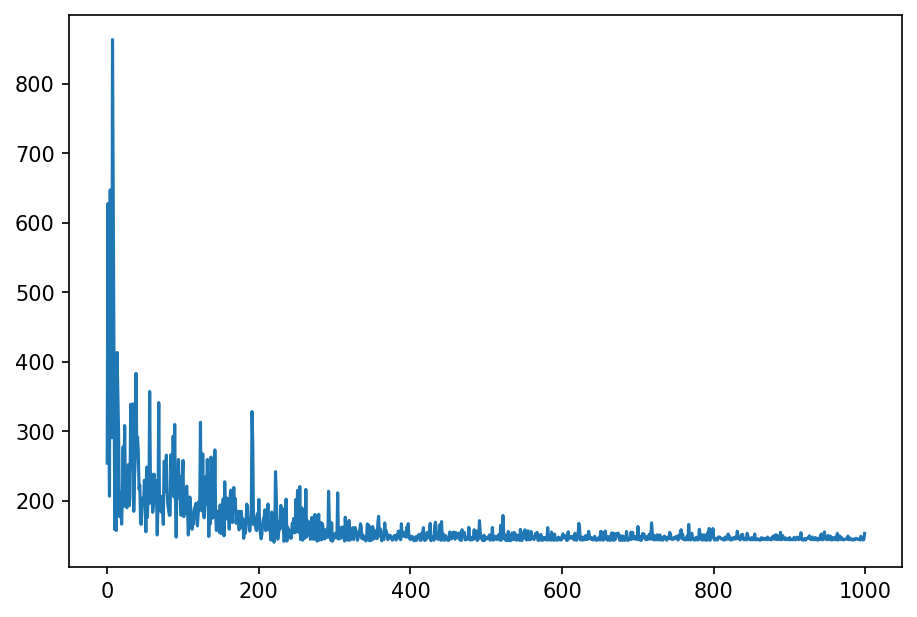

In [2]:
config = load_config('linear.yaml')
x = config._model.stochastic_specs['x']
y = config.conditioning['obs']
err = config._model.stochastic_specs['err']
losses = config.fit(lr=1e-2, n_steps=1000)

plt.plot(losses)

In [3]:
ppd = config.ppd(plate_stack=[1000])

param_names = ('a', 'b')

post_samples = {key: ppd['guide_trace'].nodes[key]['value'].detach().numpy()
                for key in param_names}
y_pred = ppd['model_trace'].nodes['y']['value']

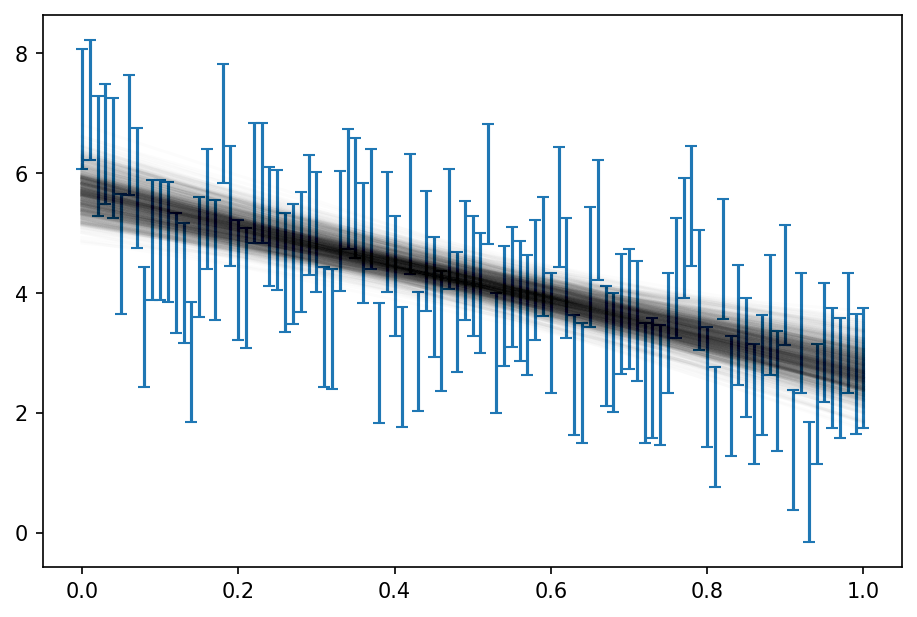

In [4]:
plt.errorbar(x, y, err, ls='none', capsize=3)
plt.plot(x, y_pred.T, 'k-', alpha=0.01);

/usr/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3361: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):
/usr/lib/python3.9/site-packages/corner/core.py:103: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(


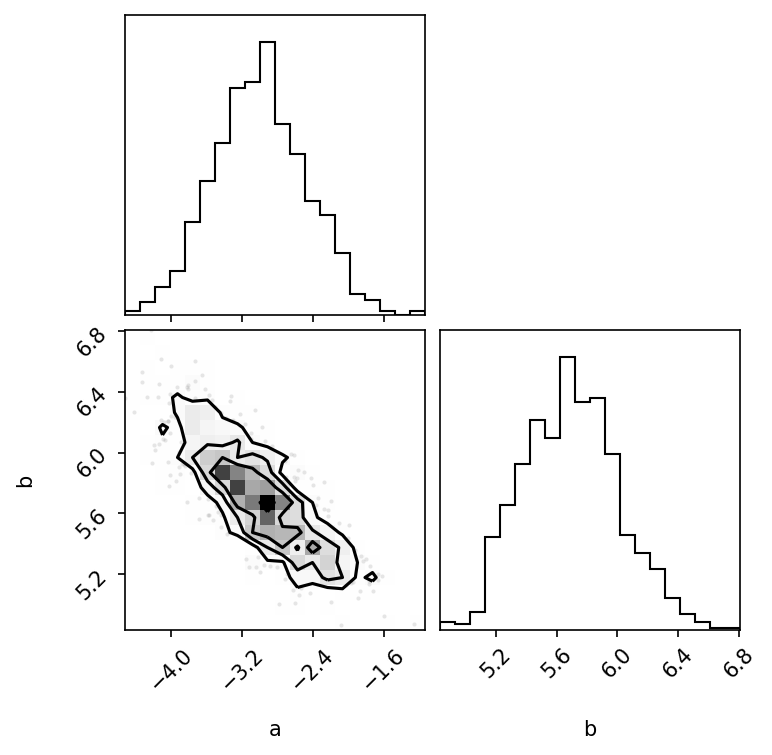

In [5]:
corner.corner(np.stack(post_samples.values(), -1), labels=param_names);